# Ordinary Percolation

In [1]:
import openpnm as op
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider
%matplotlib inline

In [2]:
N = 100
net = op.network.Cubic(shape=[N, N, 1], spacing=2.5e-5)
geom = op.geometry.StickAndBall(network=net, pores=net.Ps, throats=net.Ts)
water = op.phases.Water(network=net)
phys = op.physics.Standard(network=net, phase=water, geometry=geom)

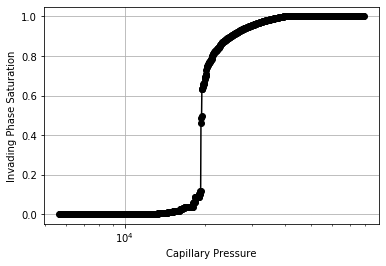

In [3]:
alg = op.algorithms.OrdinaryPercolation(network=net)
alg.setup(phase=water, pore_volume='pore.volume', throat_volume='throat.volume')
alg.set_inlets(pores=net.pores('left'))
alg.set_outlets(pores=net.pores('right'))
alg.run(points=1000)
alg.plot_intrusion_curve()
plt.show()

In [4]:
data = alg.get_intrusion_data()
mask = np.logical_and(np.asarray(data.Snwp) > 0.0 , np.asarray(data.Snwp) < 1.0)
mask = np.argwhere(mask).flatten()
pressures = np.asarray(data.Pcap)[mask]

In [5]:
def plot_saturation(step):
    arg = mask[step]
    Pc = np.ceil(data.Pcap[arg])
    sat = np.around(data.Snwp[arg], 3)
    is_perc = alg.is_percolating(Pc)
    pmask = alg['pore.invasion_pressure'] <= Pc
    im = pmask.reshape([N, N])
    fig, ax = plt.subplots(figsize=[10, 10])
    ax.imshow(im, cmap='Blues')
    title = ('Capillary Pressure: '+str(Pc)+' Saturation: '+str(sat)+
             ' Percolating : '+str(is_perc))
    plt.title(title)
    plt.show()

In [7]:
perc_thresh = alg.get_percolation_threshold()
thresh_step = np.argwhere(np.asarray(pressures) == perc_thresh)
interact(plot_saturation, step=IntSlider(min=0, max=len(mask)-1, step=1, value=thresh_step))

interactive(children=(IntSlider(value=178, description='step', max=448), Output()), _dom_classes=('widget-inte…

<function __main__.plot_saturation(step)>